# Data Sourcing

In this notebook, various data sourcing is put together, described and prepared. At first, the precide modelling data is investigated and the potential data sources are investigated.

In [1]:
import pandas as pd
import numpy as np

## What do we have?

In [2]:
filename = 'data/data_dups_removed.csv'
source = pd.read_csv(filename, index_col = 0)

The main modelling data that is found id the the so-called 'SMILES' data: https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system

In [3]:
source['SMILES'].head()

0    C[n+]1c2cc(N)ccc2cc2ccc(N)cc21.Nc1ccc2cc3ccc(N...
1    O=C([O-])c1ccccc1-c1c2cc(Br)c(=O)c(Br)c-2oc2c(...
2    CO[C@H]1CC(O[C@H]2C[C@H]([C@H]3O[C@](C)(O)[C@H...
3    CN(C)c1ccc(C(=C2C=CC(=[N+](C)C)C=C2)c2ccccc2)c...
4    CC(=O)O.CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(=...
Name: SMILES, dtype: object

We also have molecular weight (which is out only quantitative molecular descriptor):

In [4]:
source['FW'].head()

0     468.9806
1     691.8542
2     934.1584
3     927.0048
4    1342.5025
Name: FW, dtype: float64

## What are our data engineering options?

There are two natural areas of data engineering that will be investigated:

1. The SMILES data are strings, thus employing the use of tools from NLP would be useful, in particular we can use bag of wards (BOW) and vectorise the inputs for the use on sequential models (like RNN's).

2. Employ damain molecular knowledge to investigate molecular representations of the smiles data : This would involve the use of pythonic libraries which specifically try to do this.

Both directions are investigate here in the following ways:

1. The basic technique is explained (particularly using code written in #INSERT SCRIPT NAME#.
2. A pointer to the relevant part of the script is shown.

## Bag of words

The bag of words technique, is the simple count the number of unique tokens in the sentence/word/document. In our case, the smile is a word and the components that are counted are the characters that make it up.

A very important domain issue is that each character of the SMILE is not necessarily independent but may vry well be a part of an atom, thus we should treat the atoms of a SMILE as characters/words of the words/sentence.

In [5]:
import drugdiscovery.preprocessing as pp

In [6]:
data = source.copy()
smiles = data['SMILES'].values

In [7]:
print(smiles[1])
print(pp._split(smiles[1]))

O=C([O-])c1ccccc1-c1c2cc(Br)c(=O)c(Br)c-2oc2c(Br)c([O-])c(Br)cc12.[Na+].[Na+]
O = C ( [ O - ] ) c 1 c c c c c 1 - c 1 c 2 c c ( Br ) c ( = O ) c ( Br ) c -2 o c 2 c ( Br ) c ( [ O - ] ) c ( Br ) c c 1 2 . [ Na + ] . [ Na + ]


In [8]:
bow = pp.BagOfWordsMols(smiles[:5])
bow_mat = bow.fit()
bow_transform  = bow.transform(smiles[5:10])

In [9]:
bow_mat

array([[ 2.,  1.,  0.,  2.,  3.,  0.,  3.,  2.,  4.,  4.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  1.,  6.,  0., 26.,  2.,  1.,  0.,  2.,  0.],
       [ 4.,  1.,  0.,  2.,  7.,  0.,  7.,  4.,  4.,  0.,  2.,  1.,  1.,
         2.,  0.,  3.,  4.,  2.,  3.,  4., 19.,  0.,  0.,  0.,  0.,  0.],
       [25., 47.,  3.,  1., 19., 19., 19., 25.,  2.,  1.,  0.,  0.,  0.,
         1., 31.,  1., 17.,  1.,  4.,  0.,  0.,  4.,  0.,  2.,  0.,  0.],
       [ 4., 28.,  0.,  4., 16.,  0., 16.,  4.,  4.,  4.,  0.,  0.,  0.,
        14.,  0.,  2., 12.,  2.,  8.,  0., 24.,  0.,  0.,  0.,  0.,  0.],
       [12., 41.,  0.,  1., 21., 12., 21., 12., 12., 13.,  0.,  0.,  0.,
        12., 12.,  0., 14.,  0.,  4.,  0., 25.,  0.,  0.,  0.,  4.,  0.]])

In [10]:
bow_transform

array([[ 0., 14.,  0.,  0.,  4.,  0.,  4.,  0.,  2.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  1.],
       [ 3.,  1.,  0.,  0.,  2.,  1.,  2.,  3.,  2.,  1.,  0.,  0.,  0.,
         1.,  0.,  1.,  3.,  1.,  2.,  0.,  6.,  0.,  0.,  0.,  0.,  1.],
       [ 0., 10.,  0.,  0.,  4.,  0.,  4.,  0.,  0.,  2.,  0.,  0.,  0.,
         2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.],
       [ 0., 16.,  0.,  1.,  3.,  0.,  3.,  0.,  2.,  2.,  0.,  0.,  0.,
         1.,  0.,  0.,  1.,  0.,  2.,  0., 10.,  0.,  0.,  0.,  0.,  1.],
       [ 3., 18.,  0.,  2.,  5.,  2.,  5.,  3.,  2.,  1.,  0.,  0.,  0.,
         1.,  3.,  0.,  3.,  0.,  4.,  0., 13.,  2.,  0.,  0.,  2.,  3.]])

In [11]:
# the symbols that the BOW model has fit for is as follows:

In [12]:
pd.DataFrame([bow.sym_idx])

,],C,4,.,(,H,),[,1,N,...,O,+,2,Br,c,3,Cl,5,n,_unk_
0,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25


## Vector/Token representation

The vector representation provides a vectoral representation that maintains the sequeunces of the tokens (in this case atoms).

In [13]:
vr = pp.VectorRepresentationMols(smiles[:5])
vr_mat = vr.fit()
vr_transform  = vr.transform(smiles)

In [14]:
vr_mat.shape

(5, 222)

In [15]:
vr_transform

array([[ 1,  7, 24, ..., 26, 26, 26],
       [16, 13,  1, ..., 26, 26, 26],
       [ 1, 16,  7, ...,  2, 17,  0],
       ...,
       [25, 13,  1, ..., 26, 26, 26],
       [25, 13,  1, ..., 26, 26, 26],
       [ 1,  1,  1, ..., 26, 26, 26]])

## Morgan Fingerprint representation

In general a fingerprint is when a 'large' amount of data is compressed into a bit representation. This is done using a mapping between molecules and the bit representation. The map in of itself provides hashings of structural information about the molecule. Some details can be found in https://towardsdatascience.com/a-practical-introduction-to-the-use-of-molecular-fingerprints-in-drug-discovery-7f15021be2b1. Luckily, there is the RdChem library which adequetly offers a simple way to obtain these fingerprints. Code has been written to wrap around this call. Note, that unlike the previous representation there is not real notion of 'fitting' since the mappings are based on the smile itself as opposed to the data seen before. However, the call to perform that transformation is labelled 'transform' as opposed to 'fit' to distinguish this difference.

In [16]:
mfp = pp.MorganFingerprints(smiles[:5])
mfp_mat = mfp.transform()

In [17]:
mfp_mat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [18]:
mfp_mat.shape

(5, 2048)

## Murcko Scaffolds and known toxicophore

The murcko scaffolds are a way to reduce a complicated molecule to some core part of the molecure. According to the explanation provided in https://datagrok.ai/help/domains/chem/functions/murcko-scaffolds. This is common in medicinal chemistry and offers first basis for a systematic study for the a set of molecules. 

As with the fingerprint mapping, this is a mapping that can be applied from a smile to another smile.

In [28]:
ms = pp.MurckoScaffold(smiles[:5])
ms_smiles = ms.transform()

The rdchem library can be used to show what the scaffold of the molecules look like.

In [29]:
from rdkit import Chem

mol_list = []
for i in range(0,2):
    mol_list.append(Chem.MolFromSmiles(smiles[i]))
    mol_list.append(Chem.MolFromSmiles(ms_smiles[i]))

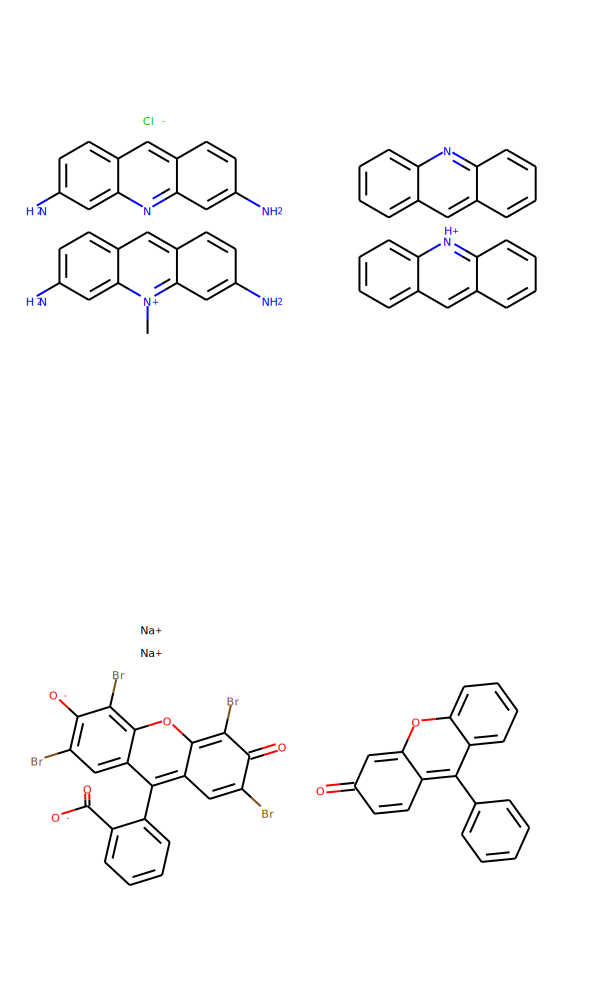

In [30]:
from rdkit.Chem import Draw
img = Draw.MolsToGridImage(mol_list, molsPerRow=2, subImgSize=(300, 500), maxMols=10,
                           legends=None, useSVG=True)
img

One thing that we will do is take a set of known toxic molecules, find the dice similarity between them and the rest of the SMILES dataset to see how much the candidate molecules resemble the the known toxic ones. It's useful to consider the scaffolding for this since it takes the essential structure of the molecule only. 

## Molecular Descriptors

Within the domain of the molecules study, we can also consider quantitative molecular descriptors of the molecules themselves. This can be found by using the rdkit library itself. The functionality has been wrapped with specific descriptors being called in the following functions.

In [31]:
smile = smiles[0]
mol = Chem.MolFromSmiles(smile) 
moldes = pp.MolecularDescriptors(mol)
res = moldes.compute_all(mol)
res

RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: molecule has no conformers
RDKit ERROR: Violation occurred on line 145 in file /Users/runner/miniforge3/conda-bld/rdkit_1589101086697/work/Code/GraphMol/Descriptors/PMI.cpp
RDKit ERROR: Failed Expression: mol.getNumConformers() >= 1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:31:51] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: molecule has no conformers
RDKit ERROR: Violation occurred on line 154 in file /Users/runner/miniforge3/conda-bld/rdkit_1589101086697/work/Code/GraphMol/Descriptors/PMI.cpp
RDKit ERROR: Failed Expression: mol.getNumConformers() >= 1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:31:51] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: molecule has no conformers
RDKit ERROR: Violation occurred on line 165 in file /Users/runner/miniforge3/conda-bld/rdkit_1589101086697/work/Code/GraphMol/Descriptors/PMI.cpp
RDKit ERROR: Fa

{'Asphericity': nan,
 'Eccentricity': nan,
 'InertialShapeFactor': nan,
 'NPR1': nan,
 'NPR2': nan,
 'PMI1': nan,
 'PMI2': nan,
 'PMI3': nan,
 'RadiusOfGyration': nan,
 'SpherocityIndex': nan,
 'MaxEStateIndex': 5.828705435878055,
 'MinEStateIndex': 0.0,
 'MaxAbsEStateIndex': 5.828705435878055,
 'MinAbsEStateIndex': 0.0,
 'qed': 0.15297263922933393,
 'MolWt': 468.9920000000002,
 'HeavyAtomMolWt': 443.79200000000026,
 'ExactMolWt': 468.18292248000006,
 'NumValenceElectrons': 170,
 'NumRadicalElectrons': 0,
 'MaxPartialCharge': 0.21433941204267085,
 'MinPartialCharge': -1.0,
 'MaxAbsPartialCharge': 1.0,
 'MinAbsPartialCharge': 0.21433941204267085,
 'FpDensityMorgan1': 0.5,
 'FpDensityMorgan2': 0.8529411764705882,
 'FpDensityMorgan3': 1.2941176470588236,
 'BalabanJ': 1.5670587916460938e-07,
 'BertzCT': 1562.73997709949,
 'Chi0': 23.112155217263346,
 'Chi0n': 18.664696509422413,
 'Chi0v': 19.420625455440867,
 'Chi1': 15.868213736153121,
 'Chi1n': 10.603177350108718,
 'Chi1v': 10.6031773501

## Adding Hydrogen

An aspect of the smiles are that they do not include any hydrogen atoms in their definition. Thus, we put them back in. This is a very basic call to the rdkit library which we will not include the full details of.

In [33]:
def addHs(smile):
    m=Chem.MolFromSmiles(smile)
    m=Chem.AddHs(m)
    return Chem.MolToSmiles(m)

In [37]:
print(smiles[34])
print(addHs(smiles[34]))

COc1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccc(F)cc3)CC2)cc1
[H]c1c([H])c(C([H])([H])n2c(N([H])C3([H])C([H])([H])C([H])([H])N(C([H])([H])C([H])([H])c4c([H])c([H])c(OC([H])([H])[H])c([H])c4[H])C([H])([H])C3([H])[H])nc3c([H])c([H])c([H])c([H])c32)c([H])c([H])c1F


We will probably want to keep the hydrogens for any DNN type solutions, but having this many H's will pollute any RNN solution we may seek.

## Conclusion

In this notebook, various data engineering options have been investigated, both from a pure machine learning point of view (which follows from methods familiar to NLP), and those purely within the chemitry context. The following data engineering areas will be investigated in this project.

1. Bag of words
2. Vector/Token representation
3. Morgan Fingerprint
4. Murcko Scaffolds (so that BOW and vector representations can be applied)
5. Molecular Descriptors
6. Putting the hydrogen back

The script `process.py` will generate the morgan fingerprint, murcko scaffolds, molecular descriptors and put the hydrogen atoms back, but not the BOW of tokenised words. The reason is that the chemistry transformation are smile by smile and are 'unique' data transformations whereas the NLO data transformation must first be fit on training data and transforms the unseen hold out set.